In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Load dataset
#df = pd.read_csv('Air_Quality_dataset_v2.csv')
df = pd.read_csv('Air_Quality.csv')
print(df['Unique ID'].count())


17743


In [3]:
# 2. Quick info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17743 entries, 0 to 17742
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       17743 non-null  int64  
 1   Indicator ID    17743 non-null  int64  
 2   Name            17743 non-null  object 
 3   Measure         17743 non-null  object 
 4   Measure Info    17743 non-null  object 
 5   Geo Type Name   17743 non-null  object 
 6   Geo Join ID     17734 non-null  float64
 7   Geo Place Name  17734 non-null  object 
 8   Time Period     17743 non-null  object 
 9   Start_Date      17743 non-null  object 
 10  Data Value      17743 non-null  float64
 11  Message         0 non-null      float64
dtypes: float64(3), int64(2), object(7)
memory usage: 1.6+ MB
None


In [4]:
print('Missing values per column:\n', df.isna().sum())

Missing values per column:
 Unique ID             0
Indicator ID          0
Name                  0
Measure               0
Measure Info          0
Geo Type Name         0
Geo Join ID           9
Geo Place Name        9
Time Period           0
Start_Date            0
Data Value            0
Message           17743
dtype: int64


In [5]:
# 3. Clean dates
df['Start_Date'] = pd.to_datetime(df['Start_Date'], errors='coerce')

In [6]:
# 4. Basic statistics
print("Average Data Value:", df['Data Value'].mean())
print("Percentiles (25, 50, 75):", np.percentile(df['Data Value'].dropna(), [25, 50, 75]))

Average Data Value: 21.55168235360424
Percentiles (25, 50, 75): [ 8.9 15.2 26.9]


In [7]:
# 5. Top indicators and locations
print("Top 5 Indicators:\n", df['Name'].value_counts().head())
print("---------------------")
print("Top 5 Places:\n", df['Geo Place Name'].value_counts().head())

Top 5 Indicators:
 Name
Nitrogen dioxide (NO2)                              5781
Fine particles (PM 2.5)                             5781
Ozone (O3)                                          2115
Asthma emergency departments visits due to Ozone     485
Asthma hospitalizations due to Ozone                 484
Name: count, dtype: int64
---------------------
Top 5 Places:
 Geo Place Name
Southeast Queens              265
Canarsie - Flatlands          265
Bensonhurst - Bay Ridge       265
Downtown - Heights - Slope    265
Borough Park                  265
Name: count, dtype: int64


In [8]:
# 6. Group analysis
# a) Average Data Value per Indicator
indicator_avg = df.groupby('Name')['Data Value'].mean().sort_values(ascending=False)
print("Average Data Value by Indicator:\n", indicator_avg)
print("---------------------")
# b) Average Data Value per Place
place_avg = df.groupby('Geo Place Name')['Data Value'].mean().sort_values(ascending=False)
print("Top 5 places by avg Data Value:\n", place_avg.head())

Average Data Value by Indicator:
 Name
Annual vehicle miles traveled                             73.430218
Asthma emergency departments visits due to Ozone          71.978969
Annual vehicle miles traveled (cars)                      67.773832
Asthma emergency department visits due to PM2.5           65.850417
Boiler Emissions- Total NOx Emissions                     53.791667
Deaths due to PM2.5                                       46.077500
Ozone (O3)                                                30.290875
Nitrogen dioxide (NO2)                                    20.669521
Cardiovascular hospitalizations due to PM2.5 (age 40+)    16.773333
Respiratory hospitalizations due to PM2.5 (age 20+)       13.381250
Asthma hospitalizations due to Ozone                      12.237397
Boiler Emissions- Total SO2 Emissions                     10.991667
Fine particles (PM 2.5)                                    9.196402
Cardiac and respiratory deaths due to Ozone                4.967083
Annual ve

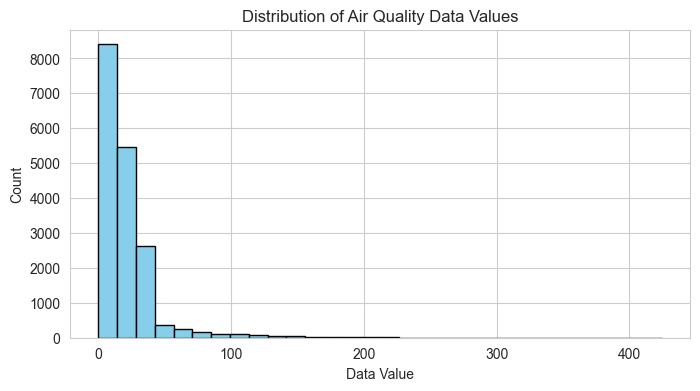

In [9]:
# 7. Visualizations
sns.set_style('whitegrid')

# 7a. Histogram of Data Values
plt.figure(figsize=(8,4))
plt.hist(df['Data Value'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Air Quality Data Values')
plt.xlabel('Data Value')
plt.ylabel('Count')
plt.show()

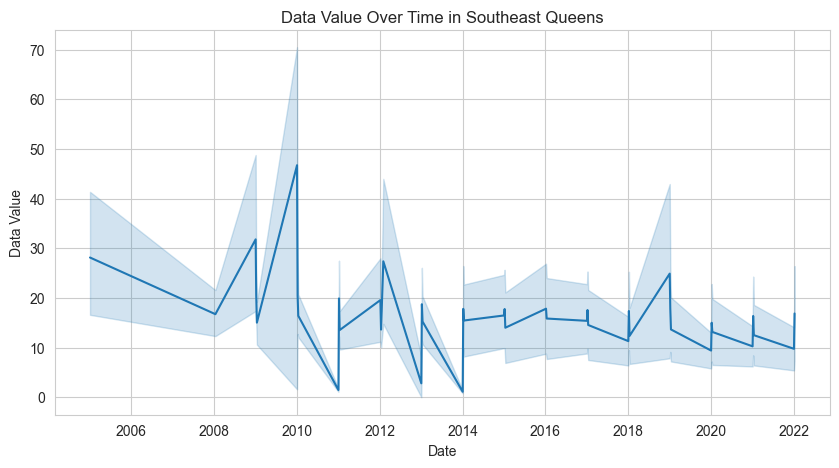

In [10]:
# 7c. Lineplot of Data Values over Time (for top 1 place)
top_place = df['Geo Place Name'].value_counts().idxmax()
df_top_place = df[df['Geo Place Name'] == top_place]

plt.figure(figsize=(10,5))
sns.lineplot(x='Start_Date', y='Data Value', data=df_top_place)
plt.title(f'Data Value Over Time in {top_place}')
plt.xlabel('Date')
plt.ylabel('Data Value')
plt.show()

In [11]:
# Assume your DataFrame is df
# and the column plotted on Y-axis is called 'Data Value'

Q1 = df['Data Value'].quantile(0.25)
Q3 = df['Data Value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers_iqr = df[
    (df['Data Value'] < lower_bound) |
    (df['Data Value'] > upper_bound)
]

# print("Outliers detected using IQR:")
# print(outliers_iqr)

# Drop outliers
df_iqr_cleaned = df[
    (df['Data Value'] >= lower_bound) & (df['Data Value'] <= upper_bound)
]


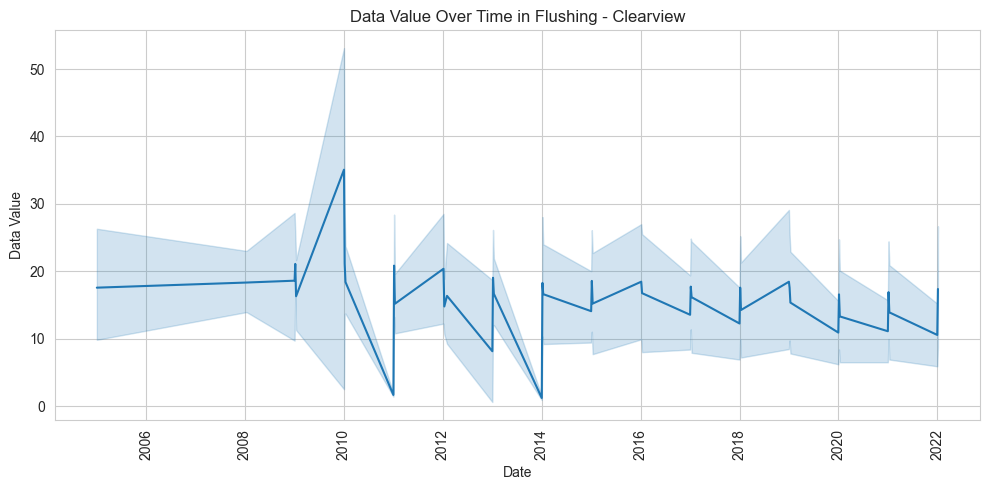

In [12]:
# 7c. Lineplot of Data Values over Time (for top 1 place)
top_place = df_iqr_cleaned['Geo Place Name'].value_counts().idxmax()
df_top_place = df_iqr_cleaned[df_iqr_cleaned['Geo Place Name'] == top_place]

plt.figure(figsize=(10,5))
sns.lineplot(x='Start_Date', y='Data Value', data=df_top_place)
plt.title(f'Data Value Over Time in {top_place}')
plt.xlabel('Date')
plt.ylabel('Data Value')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

## using Lenier Regression 
**Regression → Predict PM2.5 → Convert to AQI**

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:
df = pd.read_csv("Air_Quality_dataset_v2.csv")
print(df.head())


   Unique ID  Indicator ID                                   Name  \
0     179772           640  Boiler Emissions- Total SO2 Emissions   
1     221956           386                             Ozone (O3)   
2     221806           386                             Ozone (O3)   
3     221836           386                             Ozone (O3)   
4     221812           386                             Ozone (O3)   

          Measure Measure Info Geo Type Name  Geo Join ID  \
0  Number per km2       number         UHF42          409   
1            Mean          ppb         UHF34       305307   
2            Mean          ppb         UHF34          103   
3            Mean          ppb         UHF34          204   
4            Mean          ppb         UHF34          104   

             Geo Place Name  Time Period  Start_Date  Data Value  
0          Southeast Queens         2015  01-01-2015         0.3  
1  Upper East Side-Gramercy  Summer 2014  06-01-2014        24.9  
2        Fordham 

In [15]:
## Step 3: Filter ONLY PM2.5 data
pm25_df = df[df["Name"] == "Fine particles (PM 2.5)"]


In [16]:
pm25_df["Year"] = pm25_df["Time Period"].str.extract("(\d{4})").astype(int)

pm25_df = pm25_df[["Year", "Data Value"]]
pm25_df.columns = ["Year", "PM25"]

print(pm25_df)

     Year  PM25
6    2012   8.6
7    2012   8.0
8    2022   6.1
10   2012  10.0
11   2013   9.8
..    ...   ...
994  2021   6.7
995  2009  10.8
996  2011  10.7
997  2014   8.6
998  2018   7.4

[345 rows x 2 columns]


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\DELL\AppData\Local\Temp\ipykernel_15568\3496422405.py:1: SyntaxWarning: invalid escape sequence '\d'
  pm25_df["Year"] = pm25_df["Time Period"].str.extract("(\d{4})").astype(int)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15568\3496422405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm25_df["Year"] = pm25_df["Time Period"].str.extract("(\d{4})").astype(int)


In [17]:
X = pm25_df[["Year"]]   # input feature
y = pm25_df["PM25"]     # output

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [20]:
#slope of linear regression 
print("Slope (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)


Slope (m): -0.41421930467121154
Intercept (c): 844.0142305741805


In [21]:
#Predict PM2.5 for a future year
future_year = np.array([[2025]])
predicted_pm25 = model.predict(future_year)

print("Predicted PM2.5:", predicted_pm25[0])

c:\Users\DELL\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted PM2.5: 5.220138614977145


## AQI formula for PM2.5 (official logic)

In [22]:
def pm25_to_aqi(pm):
    if pm <= 12:
        Clow, Chigh = 0.0, 12.0
        Ilow, Ihigh = 0, 50
    elif pm <= 35.4:
        Clow, Chigh = 12.1, 35.4
        Ilow, Ihigh = 51, 100
    else:
        Clow, Chigh = 35.5, 55.4
        Ilow, Ihigh = 101, 150

    aqi = ((Ihigh - Ilow) / (Chigh - Clow)) * (pm - Clow) + Ilow
    return round(aqi, 2)


In [23]:
# predicted_aqi
predicted_aqi = pm25_to_aqi(predicted_pm25[0])

print("Predicted AQI:", predicted_aqi)

Predicted AQI: 21.75
